# TASK 1: RETRIEVING AND PREPARING THE DATA

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
#Add paths to test and training data files here
"""Created csv files Training-Data.csv and Test_Data.csv from Train Data and Test Data tabs of User Knowledge Modeling Data Set("Assignment2_Sem1_2023\Datasets\User Knowledge Modeling Data Set\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls")"""
training_data_path = r'data/Training_Data.csv'
test_data_path = r'data/Test_Data.csv'

In [10]:
# importing data 
train = pd.read_csv(training_data_path)
test = pd.read_csv(test_data_path)

In [11]:
train.head(70)

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...
...,...,...,...,...,...,...,...,...,...
65,0.25,0.10,0.03,0.09,0.15,very_low,NaN,NaN,NaN
66,0.32,0.20,0.06,0.26,0.24,very_low,NaN,NaN,NaN
67,0.29,0.06,0.19,0.55,0.51,Middle,NaN,NaN,NaN
68,0.28,0.10,0.12,0.28,0.32,Low,NaN,NaN,NaN


In [12]:
train.duplicated().sum()

0

In [13]:
# to display total null values
train.isna().sum()

STG                         0
SCG                         0
STR                         0
LPR                         0
PEG                         0
 UNS                        0
Unnamed: 6                258
Unnamed: 7                258
Attribute Information:    252
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     258 non-null    float64
 1   SCG                     258 non-null    float64
 2   STR                     258 non-null    float64
 3   LPR                     258 non-null    float64
 4   PEG                     258 non-null    float64
 5    UNS                    258 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 18.3+ KB


In [15]:
train[' UNS']

0      very_low
1          High
2           Low
3        Middle
4           Low
         ...   
253        High
254      Middle
255        High
256      Middle
257        High
Name:  UNS, Length: 258, dtype: object

In [16]:
test

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.10,0.50,0.26,0.05,Very Low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.05,0.05,0.55,0.60,0.14,Low,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.08,0.18,0.63,0.60,0.85,High,NaN,NaN,STR (The degree of study time of user for rela...
3,0.20,0.20,0.68,0.67,0.85,High,NaN,NaN,LPR (The exam performance of user for related ...
4,0.22,0.22,0.90,0.30,0.90,High,NaN,NaN,PEG (The exam performance of user for goal obj...
...,...,...,...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High,NaN,NaN,NaN
141,0.85,0.82,0.66,0.83,0.83,High,NaN,NaN,NaN
142,0.56,0.60,0.77,0.13,0.32,Low,NaN,NaN,NaN
143,0.66,0.68,0.81,0.57,0.57,Middle,NaN,NaN,NaN


In [17]:
train.duplicated().sum()

0

In [18]:
test.isna().sum()

STG                         0
SCG                         0
STR                         0
LPR                         0
PEG                         0
 UNS                        0
Unnamed: 6                145
Unnamed: 7                145
Attribute Information:    139
dtype: int64

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     145 non-null    float64
 1   SCG                     145 non-null    float64
 2   STR                     145 non-null    float64
 3   LPR                     145 non-null    float64
 4   PEG                     145 non-null    float64
 5    UNS                    145 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 10.3+ KB


In [20]:
test[' UNS']

0      Very Low
1           Low
2          High
3          High
4          High
         ...   
140        High
141        High
142         Low
143      Middle
144      Middle
Name:  UNS, Length: 145, dtype: object

In [21]:
train.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')

In [22]:
train['Attribute Information:']

0      STG (The degree of study time for goal object ...
1      SCG (The degree of repetition number of user f...
2      STR (The degree of study time of user for rela...
3      LPR (The exam performance of user for related ...
4      PEG (The exam performance of user for goal obj...
                             ...                        
253                                                  NaN
254                                                  NaN
255                                                  NaN
256                                                  NaN
257                                                  NaN
Name: Attribute Information:, Length: 258, dtype: object

In [23]:
train.drop([ 'Unnamed: 6', 'Unnamed: 7', 'Attribute Information:'], axis=1, inplace = True)

In [24]:
train.rename(columns = {' UNS':'Level'}, inplace = True)

In [25]:
train.head()

,STG,SCG,STR,LPR,PEG,Level
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [26]:
def column_changes(temp_df):  
    temp_df.drop(['Unnamed: 6', 'Unnamed: 7','Attribute Information:'], axis=1, inplace=True)
    temp_df.rename(columns = {' UNS':'Level'}, inplace = True)
    return temp_df

In [27]:
test = column_changes(test)

In [28]:
test.head()

,STG,SCG,STR,LPR,PEG,Level
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [29]:
train.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [30]:
test.describe()

,STG,SCG,STR,LPR,PEG
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.321103,0.356414,0.439241,0.428903,0.452483
std,0.212051,0.222482,0.247782,0.274403,0.287077
min,0.000000,0.000000,0.010000,0.000000,0.010000
25%,0.160000,0.200000,0.230000,0.240000,0.240000
50%,0.270000,0.290000,0.410000,0.320000,0.320000
75%,0.410000,0.520000,0.660000,0.670000,0.660000
max,0.900000,0.900000,0.910000,0.990000,0.990000


# Task 1: DATA EXPLORATION

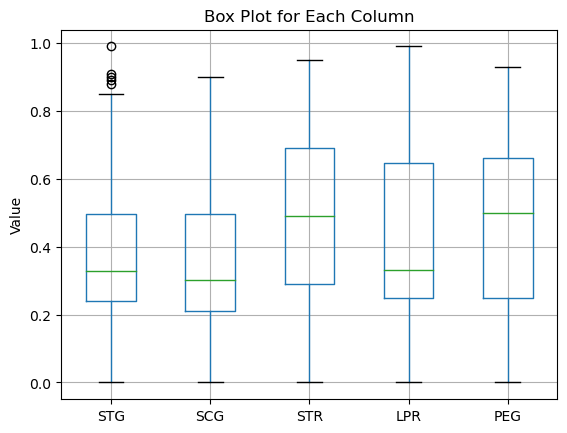

In [31]:
tempdf = train.drop('Level', axis=1)
fig, ax = plt.subplots()
tempdf.boxplot(ax=ax)
ax.set_xticklabels(tempdf.columns)

plt.ylabel('Value')
plt.title('Box Plot for Each Column')

plt.show()

Text(0.5, 1.0, 'Relation between all attributes')

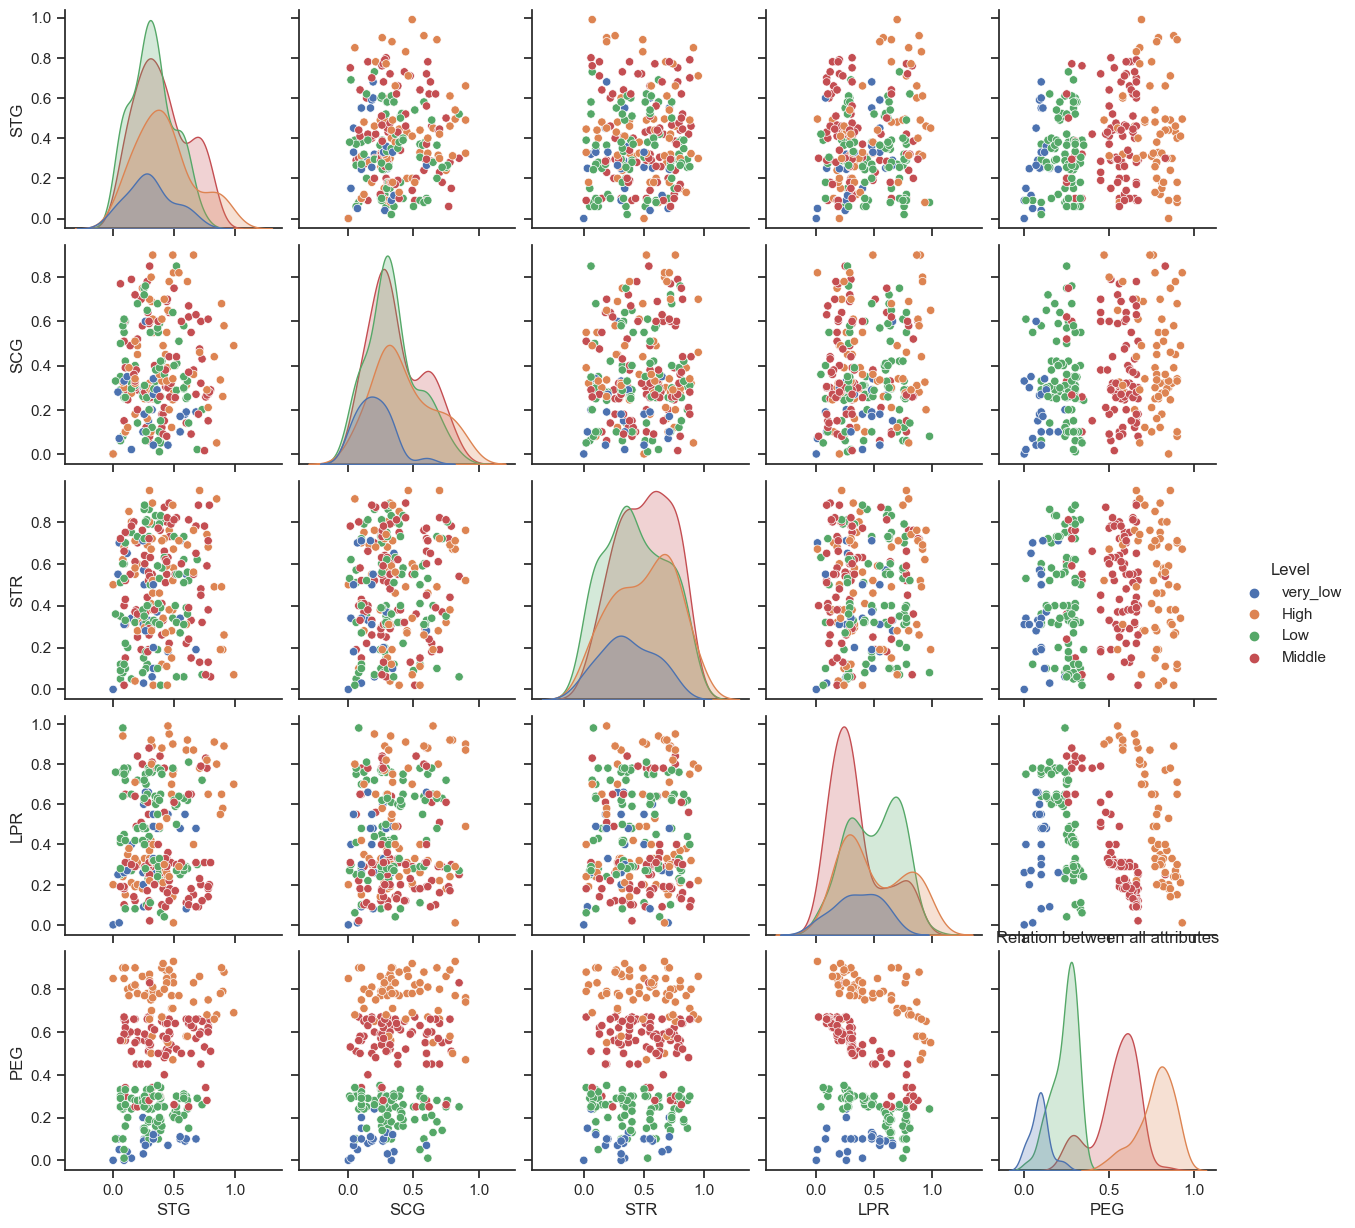

In [32]:
sns.set(style="ticks")
sns.pairplot(train, hue="Level")
plt.title("Relation between all attributes")

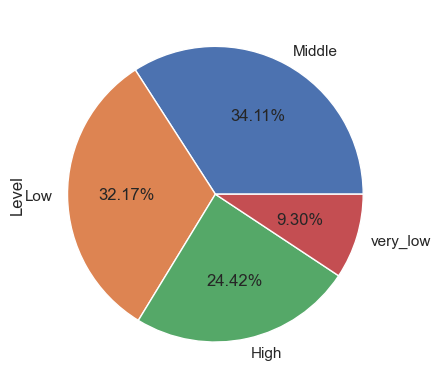

In [33]:
import matplotlib.pyplot as plt
train['Level'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

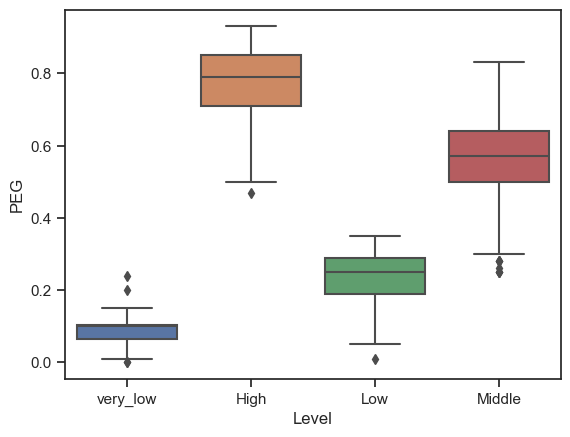

In [34]:
sns.boxplot(x='Level', y='PEG', data=train)
plt.show()

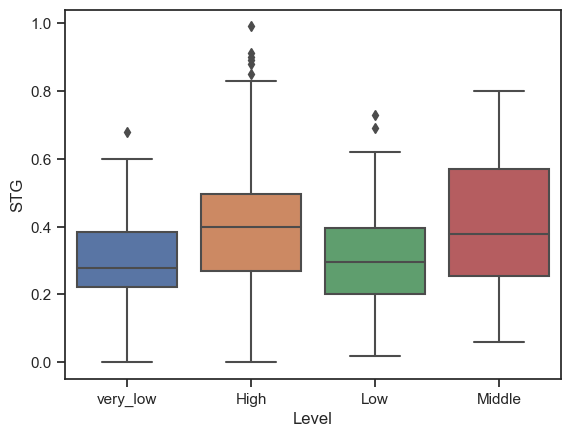

In [35]:
sns.boxplot(x='Level', y='STG', data=train)
plt.show()

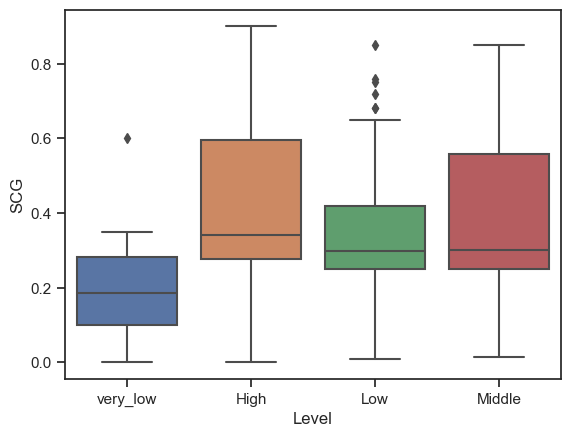

In [36]:
sns.boxplot(x='Level', y='SCG', data=train)
plt.show()

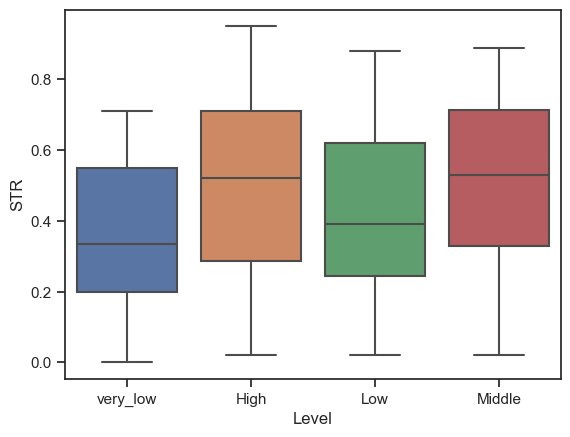

In [37]:
sns.boxplot(x='Level', y='STR', data=train)
plt.show()

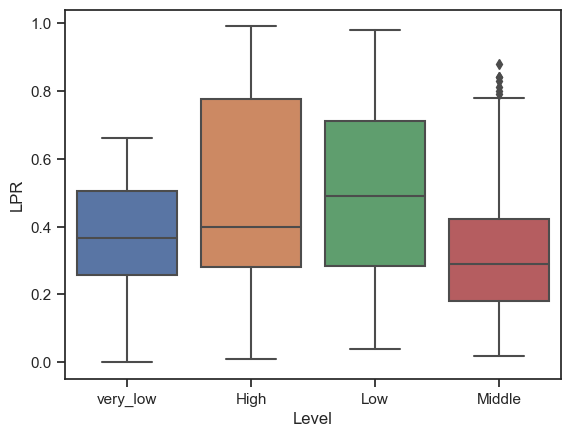

In [38]:
sns.boxplot(x='Level', y='LPR', data=train)
plt.show()

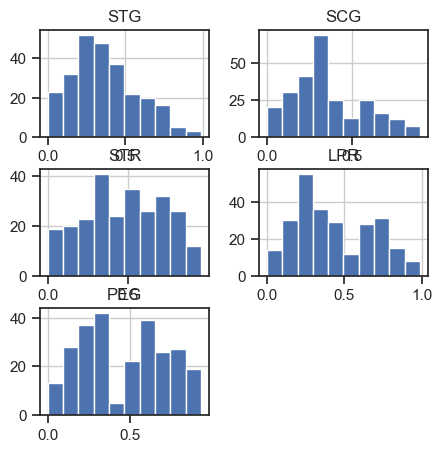

In [39]:
train.hist(figsize=(5,5))
plt.show()

# Task 3: DATA MODELLING

# K-nearest neighbour classifier:

In [40]:
train['Level'].unique()

array(['very_low', 'High', 'Low', 'Middle'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

xtrain = train.drop('Level', axis=1)
le = LabelEncoder()
ytrain = le.fit_transform(train['Level'])
xtest = test.drop('Level', axis=1)
ytest = le.fit_transform(test['Level'])

In [42]:
print('Encoding Approach:')
for i,j in zip(train['Level'].unique(), ytrain):
    print('{}  ==>  {}'.format(i,j))

Encoding Approach:
very_low  ==>  3
High  ==>  0
Low  ==>  1
Middle  ==>  2


In [43]:
ytrain

array([3, 0, 1, 2, 1, 2, 2, 3, 1, 0, 0, 1, 2, 0, 2, 0, 3, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 3, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 3, 2, 1, 0, 2, 2,
       3, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 3,
       3, 2, 1, 2, 2, 0, 3, 2, 0, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 0, 1,
       1, 2, 2, 2, 3, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 2, 2, 3, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2,
       3, 0, 2, 2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 3, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 3, 1,
       2, 3, 3, 2, 3, 1, 0, 1, 2, 2, 3, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0])

In [44]:
ytest

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       2, 1, 0, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 2, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 0,
       1, 1, 3, 2, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2])

In [45]:
bestKValue = 0 
newAcc = 0
k_values = range(1, 21)
for k in k_values:
    # Train the KNN classifier on the training set
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(xtrain, ytrain)
    
    # Evaluate the performance on the validation set
    predicted = clf.predict(xtest)
    acc = accuracy_score(ytest, predicted)
    if newAcc < acc:
        bestKValue = k
        newAcc = acc
    print(f"k={k}, accuracy={acc}")

k=1, accuracy=0.8137931034482758
k=2, accuracy=0.8
k=3, accuracy=0.8689655172413793
k=4, accuracy=0.8137931034482758
k=5, accuracy=0.8344827586206897
k=6, accuracy=0.8137931034482758
k=7, accuracy=0.8068965517241379
k=8, accuracy=0.8
k=9, accuracy=0.8
k=10, accuracy=0.7931034482758621
k=11, accuracy=0.7931034482758621
k=12, accuracy=0.7724137931034483
k=13, accuracy=0.7655172413793103
k=14, accuracy=0.7655172413793103
k=15, accuracy=0.7655172413793103
k=16, accuracy=0.7586206896551724
k=17, accuracy=0.7517241379310344
k=18, accuracy=0.7517241379310344
k=19, accuracy=0.7517241379310344
k=20, accuracy=0.7517241379310344


In [46]:
clf = KNeighborsClassifier(bestKValue)
clf.fit(xtrain, ytrain)
predicted = clf.predict(xtest)
predicted

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 3, 0, 1, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       2, 1, 0, 1, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 3, 1, 2, 1, 0, 3,
       1, 0, 2, 2, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0,
       1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2])

In [47]:
cm = confusion_matrix(ytest,predicted)
print(cm)

[[39  0  0  0]
 [ 0 44  2  0]
 [ 2  6 26  0]
 [ 0  9  0 17]]


In [48]:
print("[Train/test split] score: {:.5f}".format(clf.score(xtest, ytest)))

[Train/test split] score: 0.86897


# K-Folds Cross-Validation

In [49]:
users = pd.concat([train, test])

In [50]:
users

,STG,SCG,STR,LPR,PEG,Level
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [51]:
X = users.drop('Level', axis=1).to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])

# Create a KFold object with 5 splits
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=20, shuffle=True)
clf = KNeighborsClassifier(bestKValue)
scores = []

for k, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    scores.append(clf.score(X_test, y_test))
    
average_score = sum(scores) / len(scores)
print('Average score:', average_score)

[fold 0] score: 0.85714
[fold 1] score: 0.90476
[fold 2] score: 0.71429
[fold 3] score: 0.80000
[fold 4] score: 0.90000
[fold 5] score: 0.80000
[fold 6] score: 0.85000
[fold 7] score: 0.90000
[fold 8] score: 0.70000
[fold 9] score: 0.85000
[fold 10] score: 0.70000
[fold 11] score: 0.75000
[fold 12] score: 0.90000
[fold 13] score: 0.70000
[fold 14] score: 0.85000
[fold 15] score: 0.85000
[fold 16] score: 0.95000
[fold 17] score: 0.90000
[fold 18] score: 0.80000
[fold 19] score: 0.90000
Average score: 0.8288095238095238


# KNN with Parameter Tuning Effect

In [52]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tempdf = users.drop('Level', axis=1) 
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(0,col_num), random_state=5)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.1, random_state=0)
    clf = KNeighborsClassifier(bestKValue, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(tempdf.columns[new_Ind])

Score with 1 selected features: 0.7560975609756098
Index(['PEG'], dtype='object')
Score with 2 selected features: 0.9512195121951219
Index(['PEG', 'LPR'], dtype='object')


In [53]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tempdf = users.drop('Level', axis=1) 
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.2, random_state=0)
    clf = KNeighborsClassifier(bestKValue, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(tempdf.columns[new_Ind])

Score with 1 selected features: 0.7901234567901234
Index(['PEG'], dtype='object')
Score with 2 selected features: 0.9012345679012346
Index(['PEG', 'LPR'], dtype='object')


In [54]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tempdf = users.drop('Level', axis=1) 
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, random_state=0)
    clf = KNeighborsClassifier(bestKValue, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(tempdf.columns[new_Ind])

Score with 1 selected features: 0.7520661157024794
Index(['PEG'], dtype='object')
Score with 2 selected features: 0.7768595041322314
Index(['PEG', 'STG'], dtype='object')
Score with 3 selected features: 0.9338842975206612
Index(['PEG', 'STG', 'LPR'], dtype='object')


In [55]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tempdf = users.drop('Level', axis=1) 
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(bestKValue, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(tempdf.columns[new_Ind])

Score with 1 selected features: 0.7407407407407407
Index(['PEG'], dtype='object')
Score with 2 selected features: 0.7716049382716049
Index(['PEG', 'STG'], dtype='object')
Score with 3 selected features: 0.8888888888888888
Index(['PEG', 'STG', 'LPR'], dtype='object')


In [56]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tempdf = users.drop('Level', axis=1) 
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.5, random_state=0)
    clf = KNeighborsClassifier(bestKValue, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(tempdf.columns[new_Ind])

Score with 1 selected features: 0.7772277227722773
Index(['PEG'], dtype='object')
Score with 2 selected features: 0.9257425742574258
Index(['PEG', 'LPR'], dtype='object')


# Decision Tree Classification

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tempdf = users.drop('Level', axis=1)
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
test_sizes = [0.9,0.8,0.7,0.6,0.5,0.4, 0.3, 0.2, 0.1]
accuracies = []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=0)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    print("Test Size:", test_size)
    print("Accuracy:", accuracy)
    cm = confusion_matrix(y_test, y_pre)
    cm
    print()
max_accuracy = max(accuracies)
max_test_size = test_sizes[accuracies.index(max_accuracy)]
print("Maximum Accuracy:", max_accuracy)
print("Test Size for Maximum Accuracy:", max_test_size)
print(classification_report(y_test,y_pre))
print("[Train/test split] score: {:.5f}".format(accuracy))

Test Size: 0.9
Accuracy: 0.743801652892562

Test Size: 0.8
Accuracy: 0.7956656346749226

Test Size: 0.7
Accuracy: 0.8127208480565371

Test Size: 0.6
Accuracy: 0.8677685950413223

Test Size: 0.5
Accuracy: 0.8663366336633663

Test Size: 0.4
Accuracy: 0.8888888888888888

Test Size: 0.3
Accuracy: 0.9008264462809917

Test Size: 0.2
Accuracy: 0.8518518518518519

Test Size: 0.1
Accuracy: 0.8536585365853658

Maximum Accuracy: 0.9008264462809917
Test Size for Maximum Accuracy: 0.3
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.83      0.83      0.83        12
           2       0.85      0.92      0.88        12
           3       1.00      0.50      0.67         2
           4       0.80      0.80      0.80         5

    accuracy                           0.85        41
   macro avg       0.88      0.79      0.82        41
weighted avg       0.86      0.85      0.85        41

[Train/test split] score: 0.85366


# decision tree classification tunning

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_scores = []
tempdf = users.drop('Level', axis=1)
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users['Level'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = DecisionTreeClassifier(criterion = 'entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
cm
print(classification_report(y_test,y_pre))
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.89      0.89        37
           2       0.95      0.95      0.95        43
           3       0.50      0.40      0.44         5
           4       0.67      0.67      0.67         9

    accuracy                           0.90       121
   macro avg       0.80      0.78      0.79       121
weighted avg       0.90      0.90      0.90       121

[Train/test split] score: 0.90083


In [59]:
from sklearn import tree

with open('tree_decision.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f, feature_names=tempdf.columns, class_names=users['Level'].unique(), filled=True, rounded=True, special_characters=True)